In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [2]:
product_review1 = pd.read_csv('../System Manager/Python/Johnson & Johnson OGX Product Reviews.csv')
product_review2 = pd.read_csv('../System Manager/Python/Johnson & Johnson OGX Product Reviews 2.csv')
merged_reviews = pd.concat([product_review1, product_review2], ignore_index=True)

In [3]:
merged_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22395 entries, 0 to 22394
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     22395 non-null  object
 1   rating   22395 non-null  int64 
 2   review   22384 non-null  object
 3   product  22395 non-null  object
dtypes: int64(1), object(3)
memory usage: 700.0+ KB


In [4]:
merged_reviews[merged_reviews.isnull().any(axis=1)]

,date,rating,review,product
2381,24/4/2017,5,NaN,Thick & Full + Biotin & Collagen Shampoo
3159,23/8/2016,5,NaN,Coconut Miracle Oil Penetrating Oil
5403,24/4/2017,5,NaN,Biotin & Collagen Conditioner
7972,6/12/2017,4,NaN,ARGAN OIL MOROCCO CONDITONER
9406,6/12/2017,4,NaN,ARGAN OIL of MOROCCO SHAMPOO
11432,24/4/2017,5,NaN,Thick & Full Biotin & Collagen Shampoo
12399,10/3/2017,5,NaN,COCONUT MILK ANTI-BREAKAGE SERUM
13157,24/4/2017,5,NaN,Thick & Full Biotin & Collagen Conditioner
14605,24/4/2017,5,NaN,Biotin & Collagen Extra Volume Extra Strength ...
17401,6/12/2017,4,NaN,Renewing + Argan Oil Of Morocco Shampoo


In [5]:
duplicated_rows = merged_reviews[merged_reviews.duplicated()]
date_reviews = duplicated_rows[['date', 'review','product','rating']]
a = date_reviews.sort_values(by='product', ascending=False)
b = a
c = b.sort_values(by='date', ascending=True)
d = c[c['rating'] == 5]
print(d.shape)
d.tail(40)

(85, 4)


,date,review,product,rating
5547,25/6/2016,I've been using the Biotin & Collagen shampoo ...,Biotin & Collagen Conditioner,5
13301,25/6/2016,I've been using the Biotin & Collagen shampoo ...,Thick & Full Biotin & Collagen Conditioner,5
2525,25/6/2016,I've been using the Biotin & Collagen shampoo ...,Thick & Full + Biotin & Collagen Shampoo,5
14749,25/6/2016,I've been using the Biotin & Collagen shampoo ...,Biotin & Collagen Extra Volume Extra Strength ...,5
11576,25/6/2016,I've been using the Biotin & Collagen shampoo ...,Thick & Full Biotin & Collagen Shampoo,5
8946,27/12/2011,I use this product daily.,ARGAN OIL MOROCCO CONDITONER,5
19858,27/12/2011,I use this product daily.,Renewing + Argan Oil of Morocco Hydrating Cond...,5
18374,27/12/2011,I use this product daily.,Renewing + Argan Oil Of Morocco Shampoo,5
10380,27/12/2011,I use this product daily.,ARGAN OIL of MOROCCO SHAMPOO,5
5543,27/6/2016,"[please note that my hair hangs straight, is f...",Biotin & Collagen Conditioner,5


Text(0.5, 1.0, 'Rating')

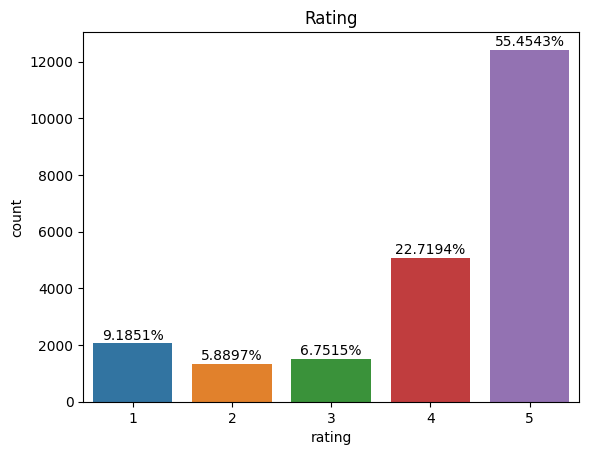

In [6]:
Total = len(merged_reviews['rating'])

ax = sns.countplot(x='rating', data=merged_reviews)
for p in ax.patches:
    percentage = f'{100*p.get_height()/Total:.4f}%\n'
    x = p.get_x() + p.get_width() /2
    y = p.get_height()
    
    ax.annotate(percentage, (x,y), ha='center', va='center')
    
plt.title('Rating', fontsize=12)

In [7]:
# Group the merged_reviews DataFrame by product and calculate the mean rating for each product
product_ratings = merged_reviews.groupby('product')['rating'].mean()

# Convert the resulting Series to a DataFrame and reset the index to make the product column a regular column
product_ratings_df = product_ratings.to_frame().reset_index()

# Rename the 'rating' column to 'mean_rating'
product_ratings_df = product_ratings_df.rename(columns={'rating': 'mean_rating'})
product_ratings_df.sort_values(by='mean_rating', ascending=False)

,product,mean_rating
65,Flexible + Beeswax Texture Hair Spray Wax,5.00
10,Anti-Gravity + Hydration O2 Conditioner,5.00
139,Purifying Charcoal Detox Shampoo,5.00
59,Ever Straight Brazilian Keratin Therapy Hydrat...,5.00
191,Thick and Full Biotiin + Collagen Weightless H...,5.00
...,...,...
75,Heavenly Hydration Cherry Blossom Shampoo,1.75
54,Deeply Restoring Pracaxi Recovery Shampoo,1.00
69,Grapefruit Mango Butter Conditioner,1.00
81,Hydrate + Repair Argan Oil of Morocco Shampoo,1.00


In [8]:
mean_rating = product_ratings_df['mean_rating'].mean()

# Calculate the number of products that have above and below average mean ratings
above_avg_count = len(product_ratings_df[product_ratings_df['mean_rating'] > mean_rating])
below_avg_count = len(product_ratings_df[product_ratings_df['mean_rating'] < mean_rating])

# Calculate the percentage of products that have above and below average mean ratings
above_avg_percent = above_avg_count / len(product_ratings_df) * 100
below_avg_percent = below_avg_count / len(product_ratings_df) * 100

Number of prodcuts having below average rating= 92
Number of prodcuts having above average rating= 120


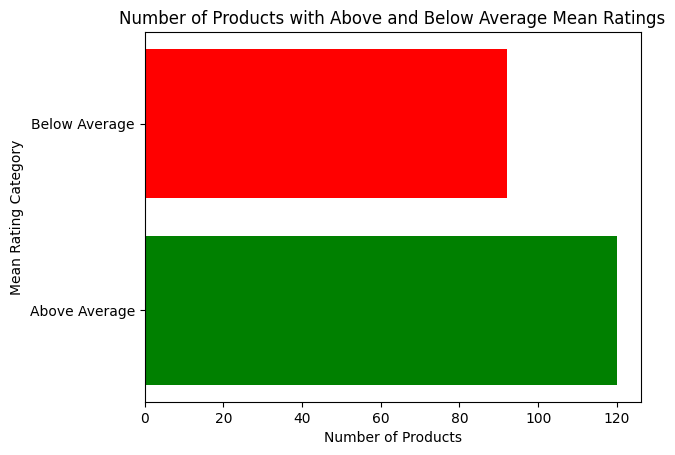

In [9]:

print('Number of prodcuts having below average rating=', below_avg_count)
print('Number of prodcuts having above average rating=', above_avg_count)

# Create the bar chart
fig, ax = plt.subplots()
ax.barh(['Above Average', 'Below Average'], [above_avg_count, below_avg_count], color=['green', 'red'])
ax.set_xlabel('Number of Products')
ax.set_ylabel('Mean Rating Category')
ax.set_title('Number of Products with Above and Below Average Mean Ratings')
plt.show()


In [10]:
#Find the products whose average rating is above the overall average rating
above_avg_products = merged_reviews.groupby('product')['rating'].mean()[mean_rating < merged_reviews.groupby('product')['rating'].mean()].sort_values(ascending=False)

#Extract the top 5 products from the above-average products
top_above_avg_products = above_avg_products.head(5)

#Find the products whose average rating is below the overall average rating
below_avg_products = merged_reviews.groupby('product')['rating'].mean()[mean_rating > merged_reviews.groupby('product')['rating'].mean()].sort_values()

#Extract the top 5 products from the below-average products
top_below_avg_products = below_avg_products.head(5)

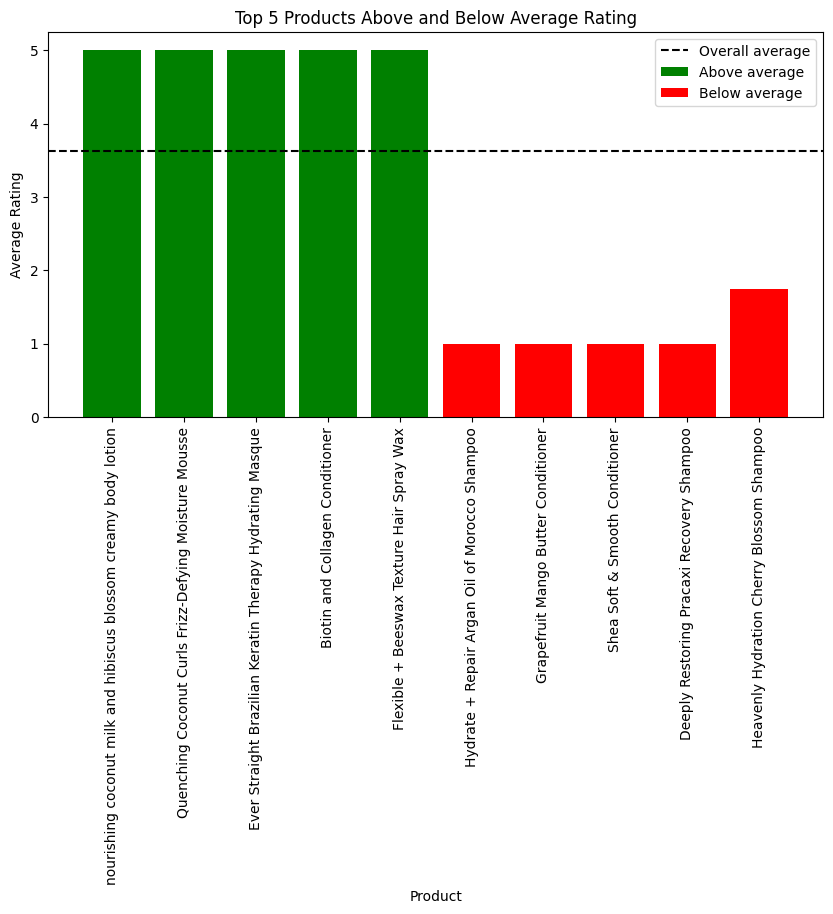

In [11]:
# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(top_above_avg_products.index, top_above_avg_products.values, color='green', label='Above average')
ax.bar(top_below_avg_products.index, top_below_avg_products.values, color='red', label='Below average')

ax.axhline(y=mean_rating, color='black', linestyle='--', label='Overall average')

ax.set_title('Top 5 Products Above and Below Average Rating')
ax.set_xlabel('Product')
ax.set_ylabel('Average Rating')

ax.legend()

plt.xticks(rotation=90)

plt.show()


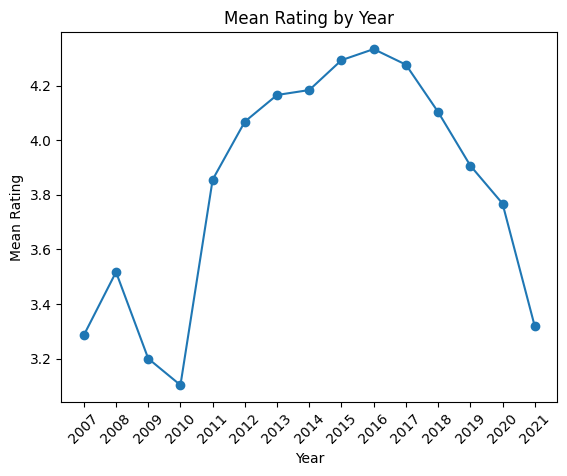

In [12]:
merged_reviews['year'] = merged_reviews['date'].str.extract(r'(\d{4})')
mean_rating_by_year = merged_reviews.groupby('year')['rating'].mean()

# Plot the mean rating for each year
plt.plot(mean_rating_by_year.index, mean_rating_by_year.values, 'o-')
plt.xlabel('Year')
plt.ylabel('Mean Rating')
plt.title('Mean Rating by Year')
plt.xticks(rotation=45)
plt.show()

Basic NLTK

In [13]:
example = merged_reviews['review'][50]
example

'I have very straight thick hair that is layered. I wash and go a lot. This adds some nice texture and is easy to use.'

In [14]:
tokens = nltk.word_tokenize(example)
nltk.pos_tag(tokens)

[('I', 'PRP'),
 ('have', 'VBP'),
 ('very', 'RB'),
 ('straight', 'JJ'),
 ('thick', 'NN'),
 ('hair', 'NN'),
 ('that', 'WDT'),
 ('is', 'VBZ'),
 ('layered', 'VBN'),
 ('.', '.'),
 ('I', 'PRP'),
 ('wash', 'VBP'),
 ('and', 'CC'),
 ('go', 'VBP'),
 ('a', 'DT'),
 ('lot', 'NN'),
 ('.', '.'),
 ('This', 'DT'),
 ('adds', 'VBZ'),
 ('some', 'DT'),
 ('nice', 'JJ'),
 ('texture', 'NN'),
 ('and', 'CC'),
 ('is', 'VBZ'),
 ('easy', 'JJ'),
 ('to', 'TO'),
 ('use', 'VB'),
 ('.', '.')]

Vader sentiment scoring

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [16]:
sia.polarity_scores('What the hell?')

{'neg': 0.697, 'neu': 0.303, 'pos': 0.0, 'compound': -0.6808}

In [17]:
sia.polarity_scores('I feel so delighted')

{'neg': 0.0, 'neu': 0.358, 'pos': 0.642, 'compound': 0.5563}

In [18]:
sia.polarity_scores('Should I jump this bridge or should I hold your hand?')

{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.4939}

In [19]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.7841}

In [20]:
text_series = merged_reviews['review'].astype(str)

scores_list = []
for text in text_series:
    scores = sia.polarity_scores(text)
    scores_list.append(scores)

scores_df = pd.DataFrame(scores_list)
scores_df


,neg,neu,pos,compound
0,0.000,0.751,0.249,0.9676
1,0.000,0.932,0.068,0.3612
2,0.336,0.664,0.000,-0.8459
3,0.079,0.748,0.173,0.8596
4,0.000,0.000,1.000,0.4404
...,...,...,...,...
22390,0.081,0.849,0.069,0.1441
22391,0.049,0.776,0.175,0.9546
22392,0.061,0.792,0.147,0.8791
22393,0.028,0.833,0.139,0.7340


In [21]:
merged_reviews = pd.concat([merged_reviews, scores_df], axis =1 )

In [22]:
merged_reviews

,date,rating,review,product,year,neg,neu,pos,compound
0,25/6/2021,5,"This is my favorite sea salt spray, and I am s...",Moroccan Sea Salt Spray,2021,0.000,0.751,0.249,0.9676
1,8/12/2020,4,I spay it on after washing my hair & let it wo...,Moroccan Sea Salt Spray,2020,0.000,0.932,0.068,0.3612
2,19/10/2020,1,I don't like this spray at all. It makes my ha...,Moroccan Sea Salt Spray,2020,0.336,0.664,0.000,-0.8459
3,11/9/2020,1,if i could give this zero stars i would. i hav...,Moroccan Sea Salt Spray,2020,0.079,0.748,0.173,0.8596
4,17/8/2020,5,Good,Moroccan Sea Salt Spray,2020,0.000,0.000,1.000,0.4404
...,...,...,...,...,...,...,...,...,...
22390,2008-08,2,"Generally, the appeal of organic conditioners ...",Vanilla Silk,2008,0.081,0.849,0.069,0.1441
22391,2008-08,5,"I liked the coconut series, so I decided to gi...",Vanilla Silk,2008,0.049,0.776,0.175,0.9546
22392,2008-08,1,I bought this conditioner while staying with f...,Vanilla Silk,2008,0.061,0.792,0.147,0.8791
22393,2008-08,4,I bought this conditioner b/c it had a mail-in...,Vanilla Silk,2008,0.028,0.833,0.139,0.7340


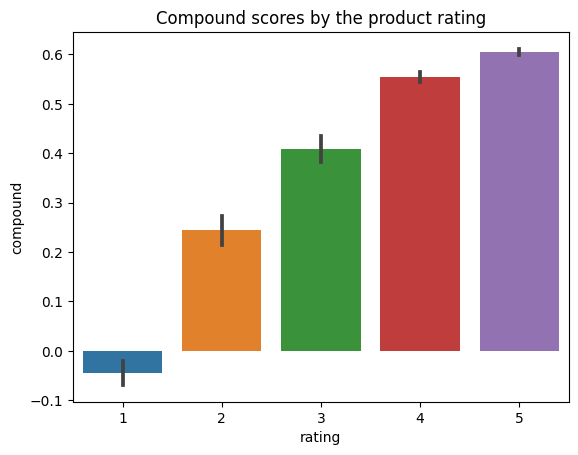

In [23]:
ax = sns.barplot(data = merged_reviews, x = 'rating', y = 'compound')
ax.set_title('Compound scores by the product rating')
plt.show()

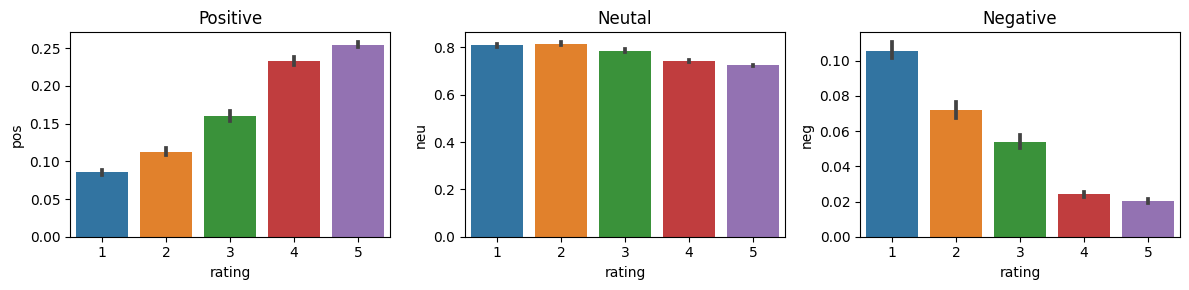

In [24]:
fig,axs = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data= merged_reviews, x='rating', y='pos', ax=axs[0])
sns.barplot(data= merged_reviews, x='rating', y='neu', ax=axs[1])
sns.barplot(data= merged_reviews, x='rating', y='neg', ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutal')
axs[2].set_title('Negative')

plt.tight_layout()
plt.show()

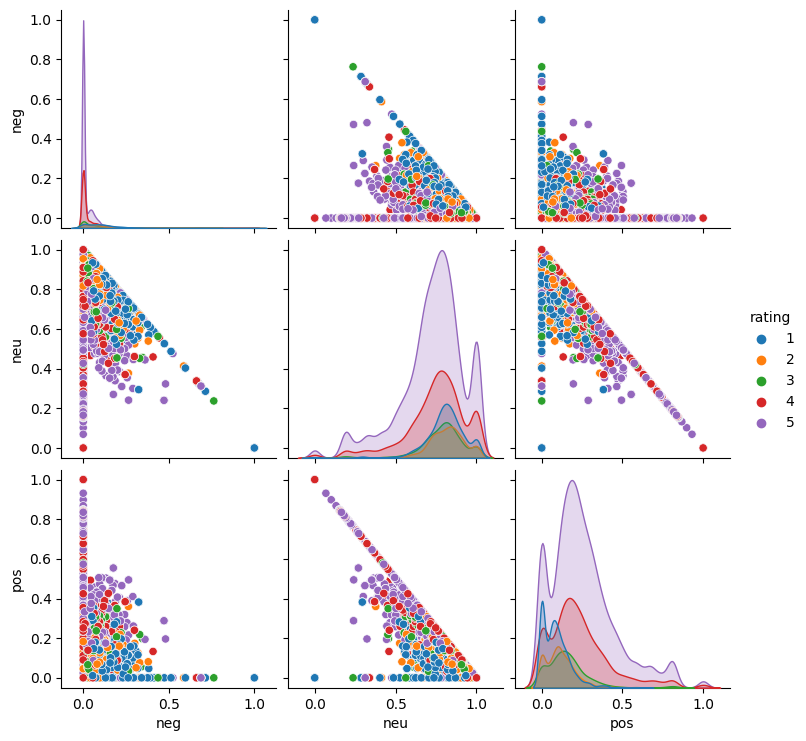

In [25]:
sns.pairplot(data=merged_reviews,
             vars=['neg', 'neu', 'pos'],
             hue= 'rating',
             palette='tab10')

plt.show()

Review examples

In [26]:
#Positive sentiment one star view

merged_reviews.query('rating == 1').sort_values('pos', ascending=False)['review'].values[100]

"Mybe because I'm a Bleach Blond, but this made my hair not only dry but left it feeling like straw. I was bummed out because I loved the sent and I was hopeing that it would work on my hair."

In [27]:
#Negative sentiment with 5 star rating

merged_reviews.query('rating == 5').sort_values('neg', ascending=False)['review'].values[100]

"I've used this product and my thin hair is boning thicker and has more body! It smells great too! I have no negative comments about this!"